In [1]:
import numpy as np
from sklearn.neighbors import NearestCentroid
from raster_data import RasterData
from display import __normalize_array
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# custom_cmap = ListedColormap(['tab:green','tab:brown', 'tab:red'])
custom_cmap = ListedColormap(['tab:green','tab:brown', 'tab:red','khaki'])

In [3]:
# burned = np.load('../data/burned.npy').T
burned = np.load('../data/burned.npy').T
# ground = np.load('ground_data.npy')
sand = np.load('../data/desert_nevada.npy')
ground = np.load('../data/ground_data_ice.npy')
# ground = np.load('california_dry.npy')
# water = np.load('water_data.npy')
# green = np.load('../data/green_selection.npy').T
green = np.load('../data/forest_green.npy')
sample_size = 500000

In [5]:
folder = '../projects/fire/images/2020_10_14/cropped/'
rgb_path = folder + 'fire_RGB_Cropped.tiff'

In [6]:
burned_size = burned.shape[0]
ground_size = ground.shape[0]
green_size = green.shape[0]
sand_size = sand.shape[0]

bur_sel = np.random.randint(0,burned_size, sample_size)
gr_sel = np.random.randint(0,ground_size, sample_size)
green_sel = np.random.randint(0,green_size, sample_size)
sand_sel = np.random.randint(0,green_size, sample_size)


burned = burned[bur_sel]
ground = ground[gr_sel]
green = green[green_sel]
sand = sand[sand_sel]

In [7]:
target = np.array([1,2,3,4]).repeat(sample_size)
# target = np.array([1,2]).repeat(sample_size)

In [8]:
input_variable = np.vstack((green,ground,burned,sand))
# input_variable = np.vstack((green,ground))

### Nearest Centroids

In [9]:
clf = NearestCentroid()
clf.fit(input_variable,target)
clf.centroids_

array([[ 299.254762,  439.96469 ,  191.191878],
       [ 315.90862 ,  199.69575 ,  112.554068],
       [ 573.873092,  464.933216,  368.37432 ],
       [2230.184886, 1575.534372, 1139.654468]])

In [10]:
rgb = RasterData(rgb_path)
reshape = rgb.shape

In [11]:
arr = rgb.flatten_array()

In [12]:
result = clf.predict(arr)

In [13]:
output = result.reshape(reshape[0],reshape[1])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


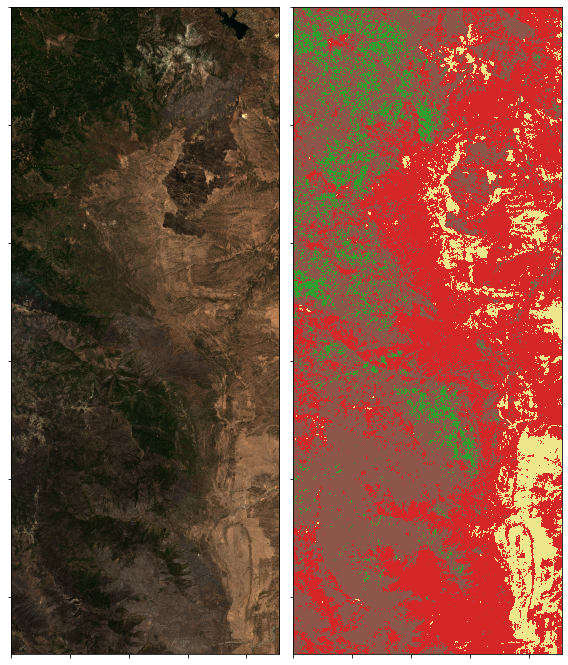

In [14]:
plt.figure(figsize=(8,20))
ax1 = plt.subplot(121)
ax1.imshow(__normalize_array(rgb.array,'rgb')*7)
ax1.set_xticklabels([])
ax1.set_yticklabels([])

ax2 = plt.subplot(122)
ax2.imshow(output,cmap=custom_cmap)
ax2.set_xticklabels([])
ax2.set_yticklabels([])

plt.tight_layout()

# Before the fire

In [1]:
folder = '/mnt/alex/ssd/Machine learning/satelliteImagery/projects/fire/images/2020_07_26/cropped/'
rgb_path = folder + 'fire_RGB_Cropped.tiff'

In [16]:
rgb = RasterData(rgb_path)
reshape = rgb.shape
arr = rgb.flatten_array()
result = clf.predict(arr)

In [17]:
output = result.reshape(reshape[0],reshape[1])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


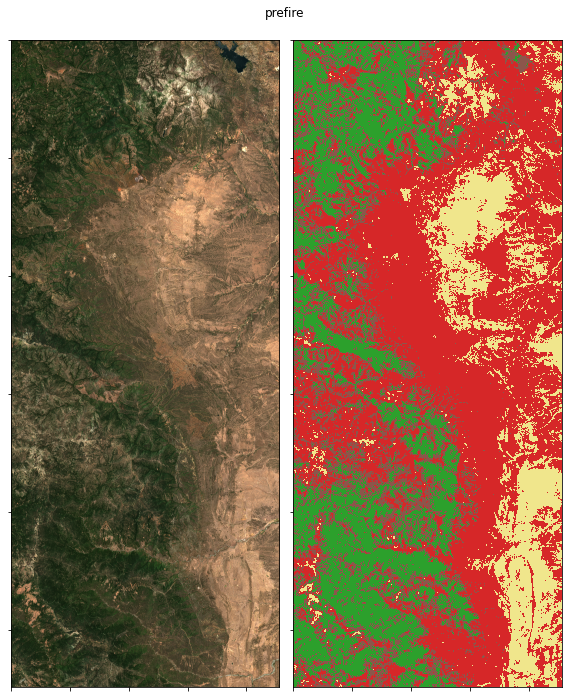

In [18]:
plt.figure(figsize=(8,10))
ax1 = plt.subplot(121)
ax1.imshow(__normalize_array(rgb.array,'rgb')*10)
ax1.set_xticklabels([])
ax1.set_yticklabels([])

ax2 = plt.subplot(122)
ax2.imshow(output,cmap=custom_cmap)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
plt.suptitle('prefire')
plt.tight_layout()